# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
# import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
forest = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Neural Network\forestfires.csv')
forest.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


In [3]:
forest.shape

(517, 31)

In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

There are no missing values

In [5]:
# checking for the duplicated values 
forest.duplicated().any()

True

In [6]:
forest.duplicated().value_counts()

False    509
True       8
dtype: int64

In [7]:
Forest = forest.copy()
data = Forest.drop_duplicates()

In [8]:
data.duplicated().any()

False

In [9]:
data.duplicated().value_counts()

False    509
dtype: int64

In [10]:
data.shape

(509, 31)

# Creating A Dataframe

In [11]:
# Select columns 
selected_columns = data[['month','day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain','area','size_category']]

# Create a new DataFrame with the selected columns
df = pd.DataFrame(selected_columns)

In [12]:
df.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small


In [13]:
df.shape

(509, 12)

## Categorical Variable Dataframe

In [14]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical varaibles are :\n\n', categorical)

There are 3 categorical variables

The categorical varaibles are :

 ['month', 'day', 'size_category']


In [15]:
df[categorical].head()

,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [16]:
# checking labels in 'month' variable
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [17]:
# checking labels in 'day' variable
df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [18]:
# checking labels in 'size_category' variable
df['size_category'].unique()

array(['small', 'large'], dtype=object)

## Numerical Variable Dataframe

In [19]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 9 numerical variables

The numerical variables are : ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [20]:
df[numerical].head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


# Visualizing Data

## 1. Analyzing Numerical Variables

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area')])

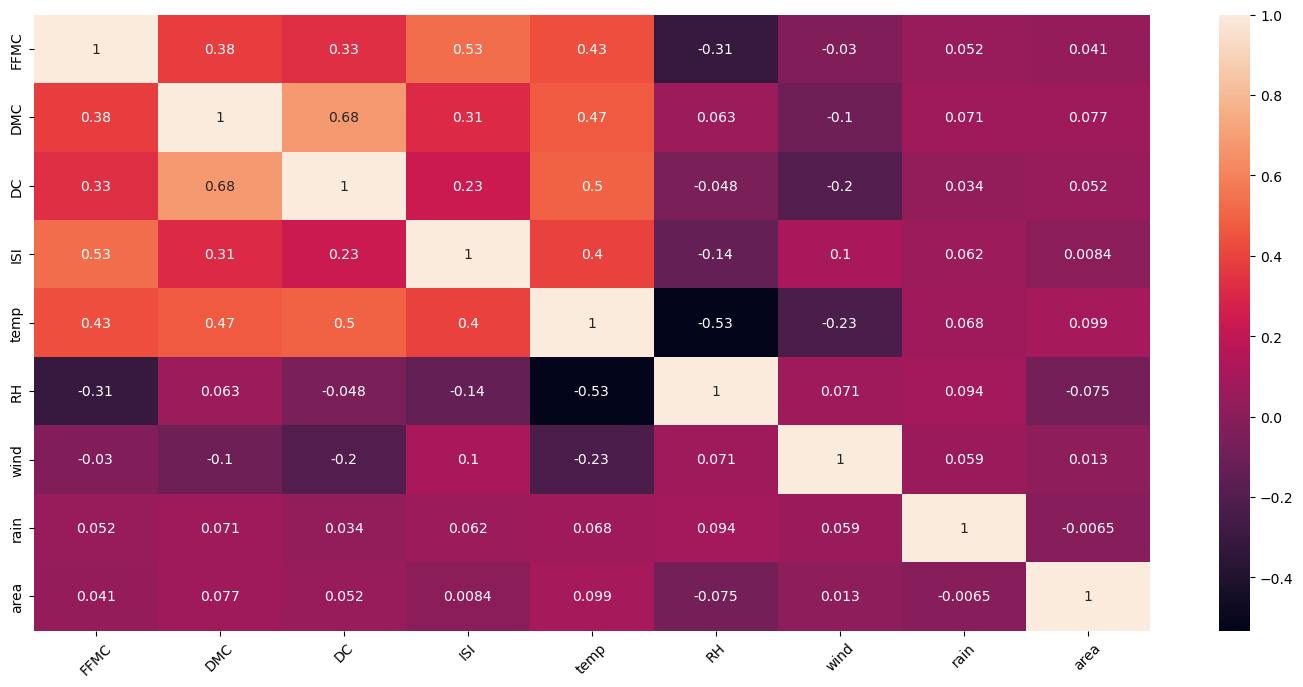

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)

## 2. Anayzing Categorical Variables

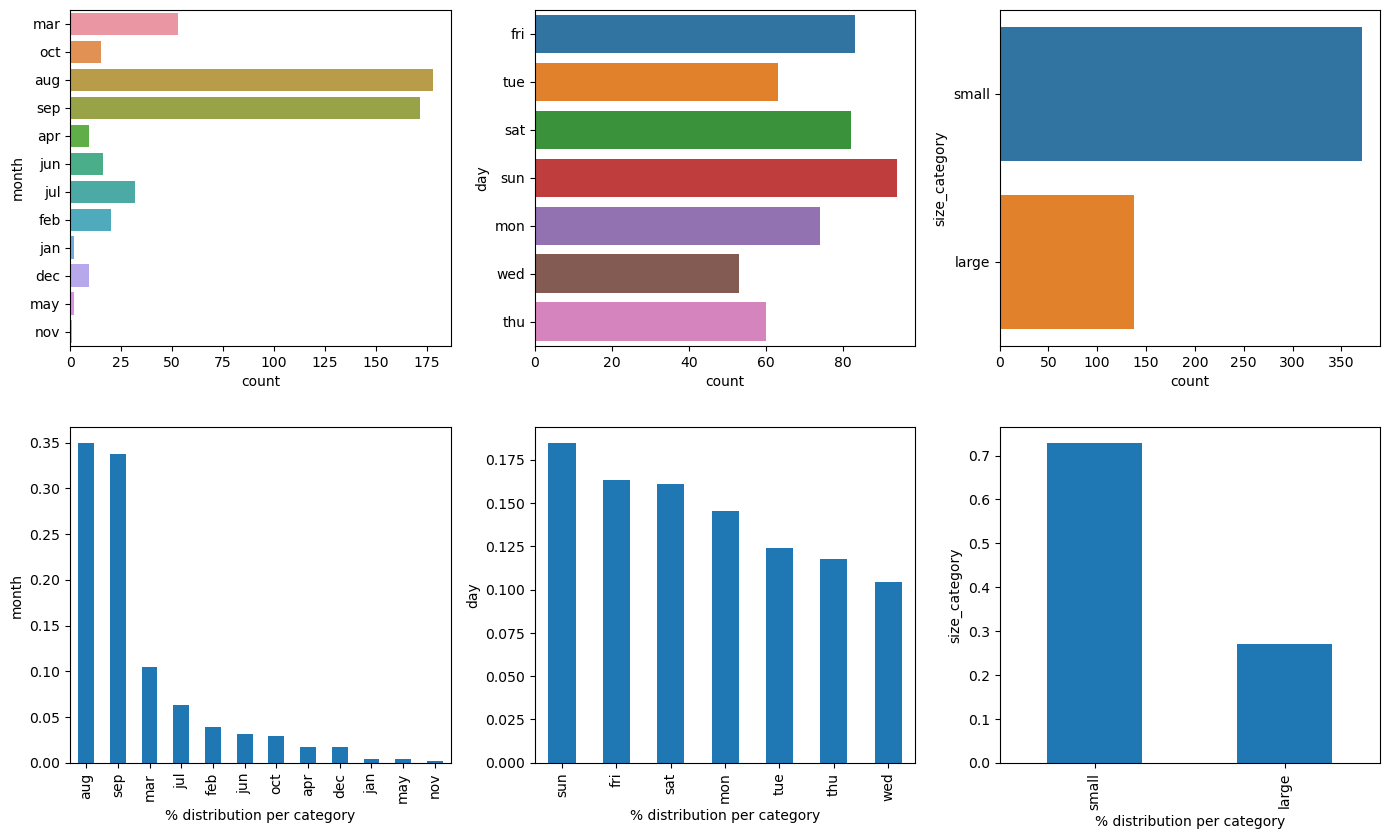

In [23]:
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df,y=col)
    plt.subplot(3,3,i+3)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

## 3. Analyzing Damaged Forest Area

In [26]:
# A categorical variable based on forest fire area damage
print(df['area'].describe())

# No damage, low, moderate, high, very high
def area(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area)
df.head()

count     509.000000
mean       12.992908
std        64.133357
min         0.000000
25%         0.000000
50%         0.610000
75%         6.580000
max      1090.840000
Name: area, dtype: float64


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No damage


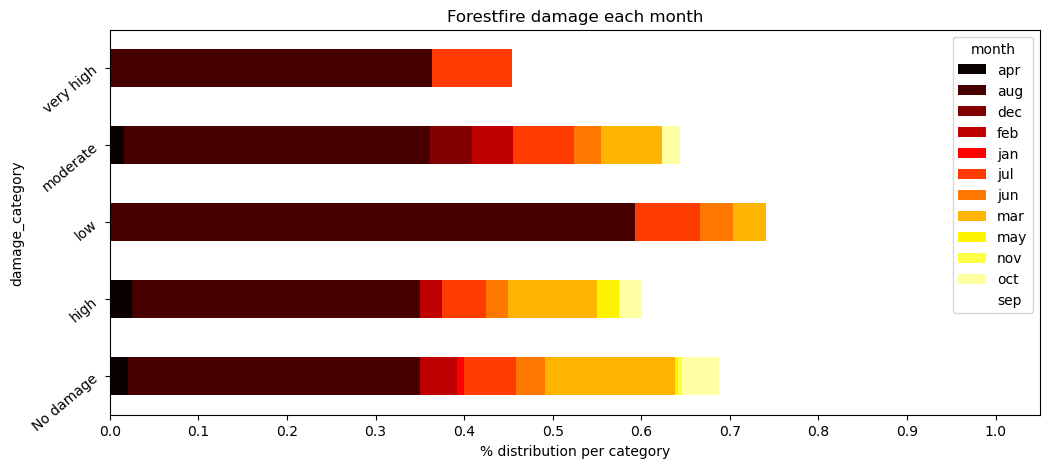

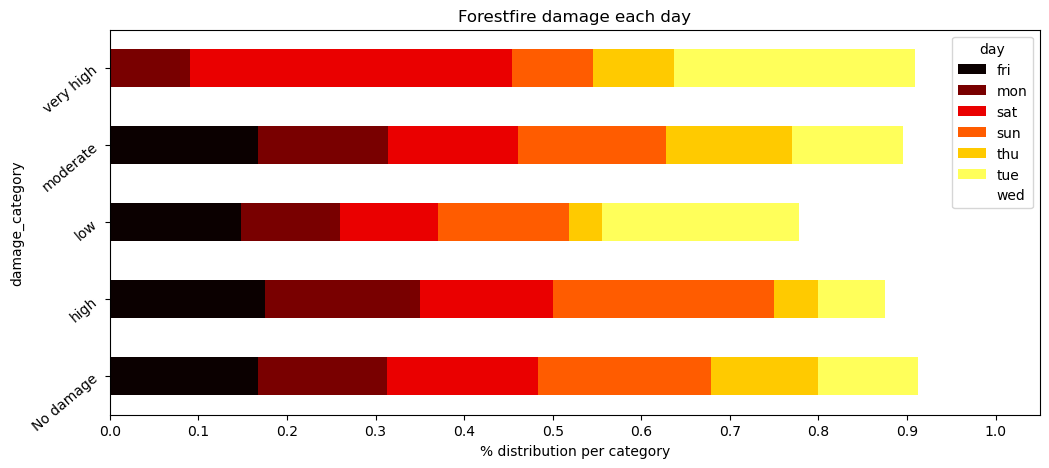

In [27]:
# Data Visualisation : Damaaged Forest Area
for col in categorical:
    if col!="size_category":
        cross = pd.crosstab(index = df['damage_category'], columns = df[col],normalize ='index')
        cross.plot.barh(stacked = True, rot = 40, cmap = 'hot', figsize = (12, 5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col))
        
plt.show()

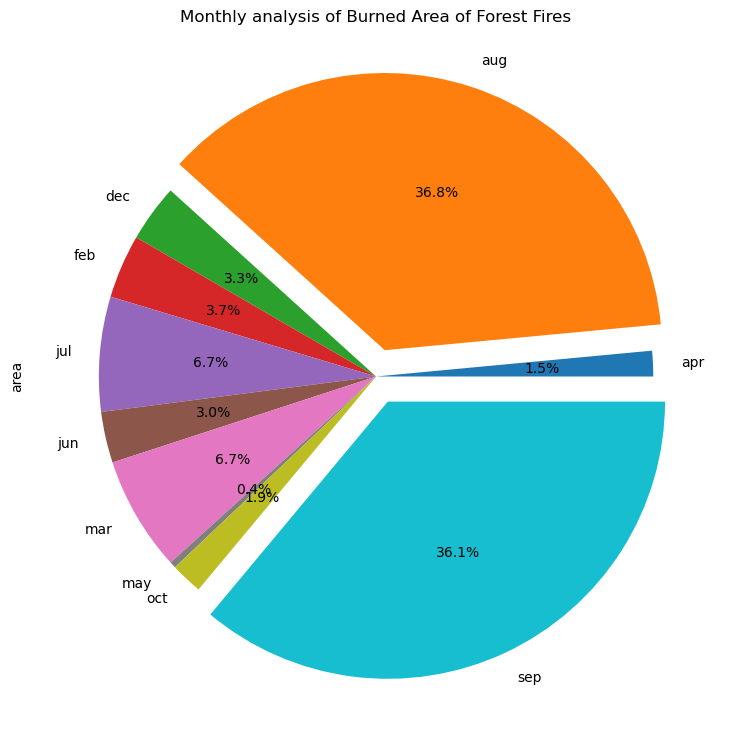

In [28]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt = df[df['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind = 'pie',title='Monthly analysis of Burned Area of Forest Fires', figsize = (9,9), explode = [0,0.1,0,0,0,0,0,0,0,0.1], autopct = '%0.1f%%')
plt.show()

# Data Pre-Processing

In [29]:
# Select columns 
selected_columns = data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain','area','size_category']]

# Create a new DataFrame with the selected columns
df = pd.DataFrame(selected_columns)

In [30]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [31]:
# encoding size_category to numeric
label_encoder = preprocessing.LabelEncoder()
df['size_category'] = label_encoder.fit_transform(df['size_category'])

In [32]:
df.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1


In [33]:
# count of size_category (small and large) 
df['size_category'].value_counts()

1    371
0    138
Name: size_category, dtype: int64

# Feature Vector and Target Variable

In [34]:
# Splitting data into test data and train data
X = df.drop('size_category', axis = 1)
y = df.size_category
# y = data[['size_category']]

In [35]:
len(X.columns)

9

# Splitting into input (X) and output (y) variables

In [36]:
# Splitting data into test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [37]:
X_train.shape, X_test.shape

((356, 9), (153, 9))

# Building Model

In [162]:
# ! pip install tensorflow

In [38]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='tanh'))  

# This line is defining the architecture of a neural network layer with 50 neurons, using the tanh activation function, and
# initializing the weights with a normal distribution. This layer is typically used in the context of a larger neural network 
# model, and may see more layers added subsequently to construct a complete neural network architecture.


# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))

# This code is adding another dense layer to a neural network model

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


# 1 (units): In this case, there is a single neuron in this layer. This suggests that the network is designed for binary 
# classification, where the output is a probability score between 0 and 1.
# This layer is often used as the final layer in a binary classification neural network model. If you're building a binary 
# classification model, this layer is responsible for producing the final output prediction.


model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])
# This line of code is configuring the compilation of a neural network model.

# Training the model with best parameters
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

# This line of code is likely training the compiled neural network model using the training data.




Epoch 1/100


24/24 [==============================] - 2s 24ms/step - loss: 0.6700 - accuracy: 0.6807 - val_loss: 0.6279 - val_accuracy: 0.7797
Epoch 2/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6370 - accuracy: 0.7017 - val_loss: 0.5973 - val_accuracy: 0.7797
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 0.6204 - accuracy: 0.7017 - val_loss: 0.5756 - val_accuracy: 0.7797
Epoch 4/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6053 - accuracy: 0.7059 - val_loss: 0.5607 - val_accuracy: 0.7797
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 0.5863 - accuracy: 0.7101 - val_loss: 0.5382 - val_accuracy: 0.7797
Epoch 6/100
24/24 [==============================] - 0s 8ms/step - loss: 0.5443 - accuracy: 0.7647 - val_loss: 0.5066 - val_accuracy: 0.8305
Epoch 7/100
24/24 [==============================] - 0s 9ms/step - loss: 0.4939 - accuracy: 0.8445 - val_loss: 0.4549 - val_accuracy: 0.8475
Epoch 8

In [39]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9804
accuracy: 98.04%


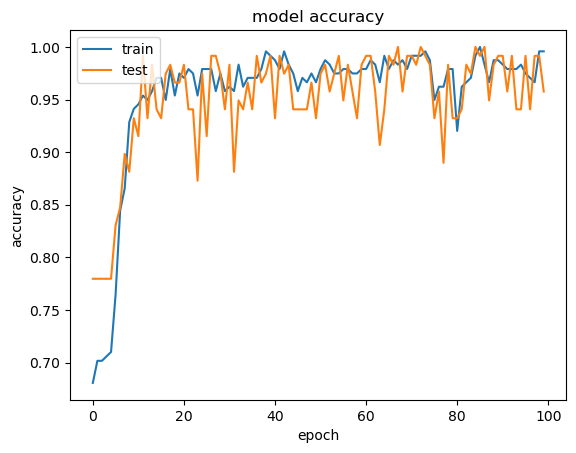

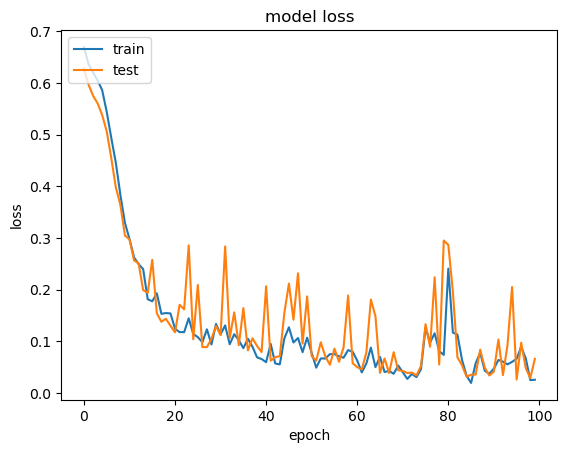

In [41]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Conclusions:
### 1. Trained a Neural Network Model for predicting burned areas of forest fires, and the final accuracy on the evaluation dataset is approximately 98.04%.
### 2. This is a promising result, suggesting that the model is performing well on the provided data.